In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv(r'C:\Users\dheof\Desktop\white_wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


1. Target: quality_label
1. Features: alcohol, density, volatile acidity, chlorides

In [60]:
df['quality_label'] = np.where(df['quality'] > 6, 1, 0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0,0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0,0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0,0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0,0


In [61]:
x = df[['alcohol', 'density', 'volatile acidity', 'chlorides']]
y = df['quality_label']

In [62]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 0
quality                 0
quality_label           0
dtype: int64

C:\Users\dheof\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol', ylabel='Density'>

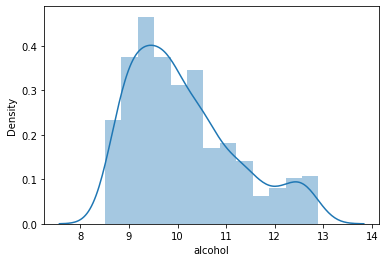

In [63]:
sns.distplot(df['alcohol'])

C:\Users\dheof\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

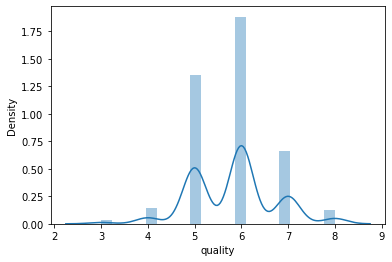

In [64]:
sns.distplot(df['quality'])

In [65]:
df['quality'].fillna(df['quality'].median(), inplace = True)
df['alcohol'].fillna(df['alcohol'].median(), inplace = True)

In [66]:
df[['quality', 'alcohol']].isnull().sum()

quality    0
alcohol    0
dtype: int64

## Data Splitting

In [67]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

In [68]:
y.value_counts()

0    422
1     98
Name: quality_label, dtype: int64

## Scaling

In [69]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [70]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled, y_train)
y_predict_class = knn.predict(x_test_scaled)

In [71]:
accuracy_score(y_test, y_predict_class)

0.9711538461538461

Akurasi metode KNN dengan 4 features dan scaling sebesar 69.23%

## Best K

In [78]:
k = range(1, 150, 2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_scaled, y_train)

    y_predict_train = knn.predict(x_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))

    y_predict_test = knn.predict(x_test_scaled)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracies.append(acc_score)

    if score < acc_score:
        score = acc_score
        best_k = i

In [79]:
print(best_k)
print(score)

1
0.9903846153846154


C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anacond

Text(0, 0.5, 'Accuracy')

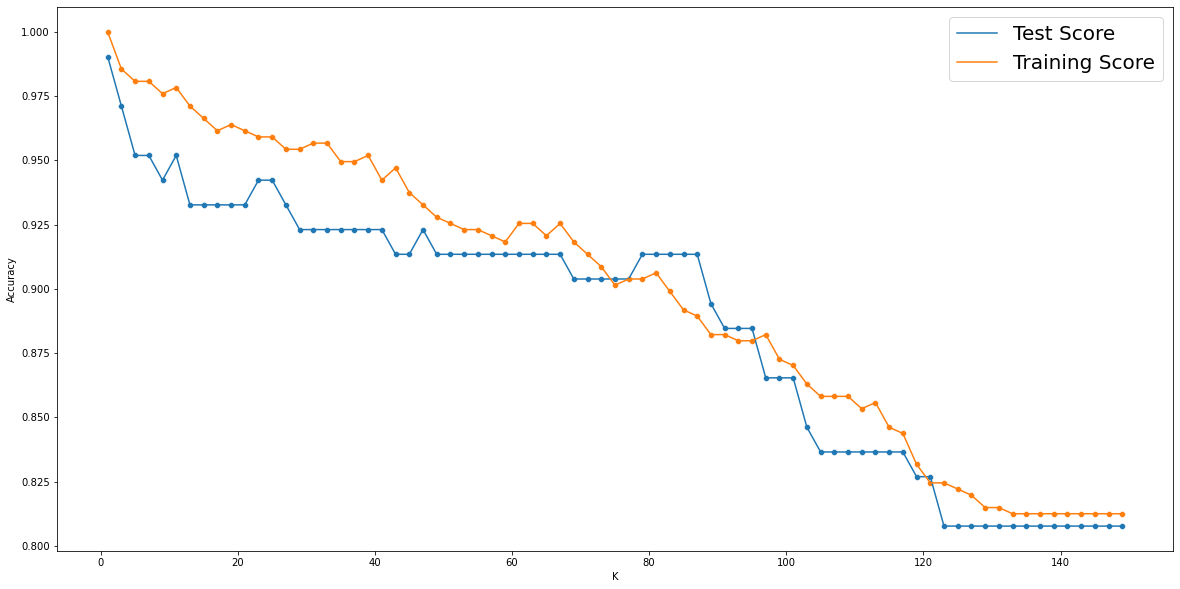

In [81]:
plt.figure(figsize=(20,10))

sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)

sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)

plt.legend(['Test Score', 'Training Score'], fontsize = 20)
plt.xlabel('K')
plt.ylabel('Accuracy')

## Ridge

In [110]:
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [111]:
df1 = pd.read_csv(r'C:\Users\dheof\Desktop\Admission_Predict.csv')
df1

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


- Traget: Chance of Admit
- Features: GRE Score, TOEFL score, university rating, sop, LOR, CGPA

In [112]:
df1.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [113]:
y = df1['Chance of Admit ']
x = df1.drop(columns = ['Chance of Admit ', 'Serial No.', 'Research'])


## Splitting

In [114]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 42
)

## Scaling

In [122]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [148]:
alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
test_mse = []
train_mse = []
score = 1000

for i in alpha:
    
    ridge = Ridge(alpha = i)
    ridge.fit(x_train_scaled, y_train)

    y_pred_train = ridge.predict(x_train_scaled)
    mse_train = mean_squared_error(y_train, y_pred_train)
    train_mse.append(mse_train)

    y_pred_test = ridge.predict(x_test_scaled)
    mse_test = mean_squared_error(y_test, y_pred_test)
    test_mse.append(mse_test)

    if score > mse_test:
        score = mse_test
        best_alpha = i
    

In [149]:
print('Score', score)
print('Alpha', best_alpha)

Score 0.004774992993240772
Alpha 0.001


In [150]:
pd.DataFrame(
    {
        'alpha': alpha,
        'score_train': train_mse,
        'score_test' : test_mse
    }
)

,alpha,score_train,score_test
0,100000.000,0.018876,0.025818
1,10000.000,0.018682,0.025581
2,1000.000,0.016947,0.023442
3,100.000,0.009304,0.013615
4,10.000,0.004620,0.006403
5,1.000,0.004006,0.005025
6,0.100,0.003950,0.004800
7,0.010,0.003949,0.004777
8,0.001,0.003949,0.004775


C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dheof\anacond

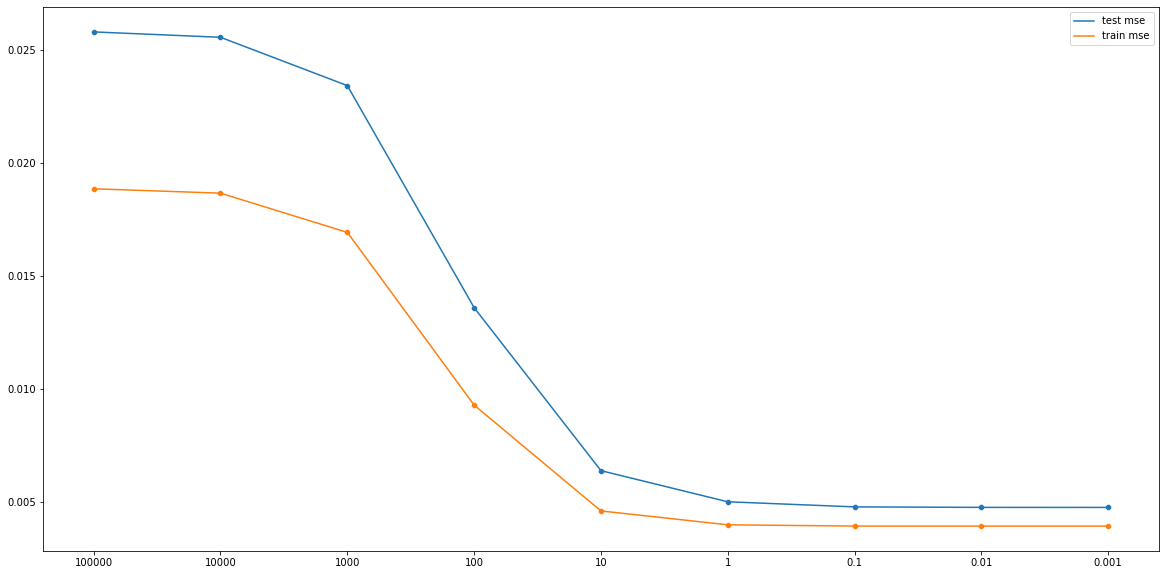

In [151]:
length = range(len(alpha))

plt.figure(figsize=(20,10))

sns.lineplot(length, test_mse)
sns.scatterplot(length, test_mse)

sns.lineplot(length, train_mse)
sns.scatterplot(length, train_mse)

plt.legend(['test mse', 'train mse' ])
plt.xticks(length, alpha)
plt.show()

1. Alpha 100000, 10000,..... 0.01 model underfitting, hasil score test dan train buruk
2. Optimal alpha spot = 0.001, mse = 0.004774992993240772


## Lasso

In [155]:
alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001]
test_mse = []
train_mse = []
score = 1000

for i in range(len(alpha)):
    
    lasso = Lasso(alpha = alpha[i])
    lasso.fit(x_train_scaled, y_train)

    
    y_pred_train = lasso.predict(x_train_scaled)
    mse_train = mean_squared_error(y_train, y_pred_train)
    train_mse.append(mse_train)

    
    y_pred_test = lasso.predict(x_test_scaled)
    mse_test = mean_squared_error(y_test, y_pred_test)
    test_mse.append(mse_test)

    
    if score > mse_test:
        score = mse_test
        best_alpha = i

In [158]:
print('Score', score)
print('Alpha', best_alpha)

Score 0.005053109338797187
Alpha 8


In [157]:
pd.DataFrame(
    {
        'alpha': alpha,
        'score_train': train_mse,
        'score_test' : test_mse
    }
)

,alpha,score_train,score_test
0,100000.000,0.018898,0.025845
1,10000.000,0.018898,0.025845
2,1000.000,0.018898,0.025845
3,100.000,0.018898,0.025845
4,10.000,0.018898,0.025845
5,1.000,0.018898,0.025845
6,0.100,0.018898,0.025845
7,0.010,0.006998,0.010611
8,0.001,0.003981,0.005053
